In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob
from skimage import color
from skimage import io
from skimage import transform
import skimage
import numpy as np
from skimage.util import img_as_float
import pandas as pd

In [0]:
def get_filelist(img_loc):
    filelist = glob.glob(img_loc+'*.jpg')
    filelist.sort()
    return filelist

In [0]:
filelist=get_filelist("/content/drive/My Drive/ISIC2018_input/")

In [0]:
def preprocessing(filelist):
    input_shape = [10015, 32, 32]
    X_orig = np.empty(input_shape)
    j=0
    for i in filelist:
        img = color.rgb2gray(io.imread(i))
        image = img_as_float(img)
        image=transform.resize(image, (32,32), mode='constant')
        X_orig[j]=image
        j=j+1
    return X_orig

In [0]:
#X_orig=preprocessing(filelist)
X_orig=np.load("/content/drive/My Drive/image_array.npy")

In [0]:
X_orig.shape

(10015, 32, 32, 1)

In [0]:
def get_Y_orig(labels_loc):
    #output_list=list()
    Y_df = pd.read_csv(labels_loc)
    Y_df=Y_df.iloc[:,1:]
#     for index,row in Y_df.iterrows():
#         if row["MEL"]==1:
#             output_list.append(0)
#         elif row["NV"]==1:
#             output_list.append(1)
#         elif row["BCC"]==1:
#             output_list.append(2)
#         elif row["AKIEC"]==1:
#             output_list.append(3)
#         elif row["BKL"]==1:
#             output_list.append(4)
#         elif row["DF"]==1:
#             output_list.append(5)
#         elif row["VASC"]==1:
#             output_list.append(6)
    return Y_df

In [0]:
labels_loc = '/content/drive/My Drive/ISIC2018_target/ISIC2018_Task3_Training_GroundTruth.csv'

Y_orig = get_Y_orig(labels_loc)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1),name="CNN_layer_1"))
model.add(Conv2D(16, kernel_size=3, activation='relu',name="CNN_layer_2"))
model.add(Conv2D(8, kernel_size=3, activation='relu',name="CNN_layer_3"))
model.add(Flatten(name="CNN_features"))
model.add(Dense(32,name="Dense_1"))
model.add(Dense(7, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_layer_1 (Conv2D)         (None, 30, 30, 32)        320       
_________________________________________________________________
CNN_layer_2 (Conv2D)         (None, 28, 28, 16)        4624      
_________________________________________________________________
CNN_layer_3 (Conv2D)         (None, 26, 26, 8)         1160      
_________________________________________________________________
CNN_features (Flatten)       (None, 5408)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense (Dense)                (None, 7)                 231       
Total params: 179,423
Trainable params: 179,423
Non-trainable params: 0
__________________________________________________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
X_orig=X_orig.reshape((10015,32,32,1))

In [0]:
np.save("/content/drive/My Drive/image_array.npy",X_orig)

In [0]:
model.fit(X_orig, Y_orig, epochs=50,batch_size=64)

Train on 10015 samples
Epoch 1/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 1.0852 - acc: 0.6673
Epoch 2/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 1.0070 - acc: 0.6721
Epoch 3/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.9558 - acc: 0.6829
Epoch 4/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.9234 - acc: 0.6912
Epoch 5/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.8959 - acc: 0.7011
Epoch 6/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.8638 - acc: 0.7070
Epoch 7/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.8310 - acc: 0.7137
Epoch 8/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.8216 - acc: 0.7183
Epoch 9/50
10015/10015 [==============================] - 11s 1ms/sample - loss: 0.8034 - acc: 0.7256
Epoch 10/50
10015/10015 [==============================] - 

In [0]:
for layer in model.layers[:12]:
  print(layer.name)

CNN_layer_1
CNN_layer_2
CNN_layer_3
CNN_features
Dense_1
dense


In [0]:
from tensorflow.keras.models import Model


In [0]:
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
classes = model.predict_classes(X_orig[0:20], batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [1 1 1 1 0 1 4 1 1 0 1 1 5 1 1 1 1 0 1 1]


In [0]:
activations = activation_model.predict(X_orig[4:5,:,:,:]) 

In [0]:
len(activations)

5

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


In [0]:
import matplotlib.pyplot as plt

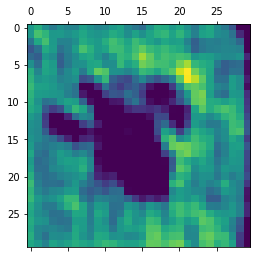

In [0]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

In [0]:
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('Dense_1').output)

In [0]:
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_layer_1_input (InputLaye [(None, 32, 32, 1)]       0         
_________________________________________________________________
CNN_layer_1 (Conv2D)         (None, 30, 30, 32)        320       
_________________________________________________________________
CNN_layer_2 (Conv2D)         (None, 28, 28, 16)        4624      
_________________________________________________________________
CNN_layer_3 (Conv2D)         (None, 26, 26, 8)         1160      
_________________________________________________________________
CNN_features (Flatten)       (None, 5408)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                173088    
Total params: 179,192
Trainable params: 179,192
Non-trainable params: 0
_______________________________________________________

In [0]:
feauture_engg_data = intermediate_layer_model.predict(X_orig)

In [0]:
feauture_engg_data=feauture_engg_data.reshape((10015,32))

In [0]:
feature_engg_data = pd.DataFrame(feauture_engg_data)

In [0]:
print('feature_engg_data shape:', feauture_engg_data.shape)

feature_engg_data shape: (10015, 32)


In [0]:
feature_engg_data.to_csv("/content/drive/My Drive/cnn_features_large.csv")